(107, 2)
Rows: 107
Cols: 2
[[ 66.]
 [ 67.]
 [ 68.]
 [ 69.]
 [ 70.]
 [ 71.]
 [ 72.]
 [ 73.]
 [ 74.]
 [ 75.]
 [ 76.]
 [ 77.]
 [ 78.]
 [ 79.]
 [ 80.]
 [ 81.]
 [ 82.]
 [ 83.]
 [ 84.]
 [ 85.]
 [ 86.]
 [ 87.]
 [ 88.]
 [ 89.]
 [ 90.]
 [ 91.]
 [ 92.]
 [ 93.]
 [ 94.]
 [ 95.]
 [ 96.]
 [ 97.]
 [ 98.]
 [ 99.]
 [100.]
 [101.]
 [102.]
 [103.]
 [104.]
 [105.]
 [106.]
 [107.]
 [108.]
 [109.]
 [110.]
 [111.]
 [112.]
 [113.]
 [114.]
 [115.]
 [116.]
 [117.]
 [118.]
 [119.]
 [120.]
 [121.]
 [122.]
 [123.]
 [124.]
 [125.]
 [126.]
 [127.]
 [128.]
 [129.]
 [130.]
 [131.]
 [132.]
 [133.]
 [134.]
 [135.]
 [136.]
 [137.]
 [138.]
 [139.]
 [140.]
 [141.]
 [142.]
 [143.]
 [144.]
 [145.]
 [146.]
 [147.]
 [148.]
 [149.]
 [150.]
 [151.]
 [152.]
 [153.]
 [154.]
 [155.]
 [156.]
 [157.]
 [158.]
 [159.]
 [160.]
 [161.]
 [162.]
 [163.]
 [164.]
 [165.]
 [166.]
 [167.]
 [168.]
 [169.]
 [170.]
 [171.]
 [172.]]
[7.24e-10 3.62e-09 8.38e-09 1.48e-08 3.71e-08 8.41e-08 2.66e-07 1.07e-06
 3.39e-06 1.07e-05 3.09e-05 7.60e-05 2.10e-

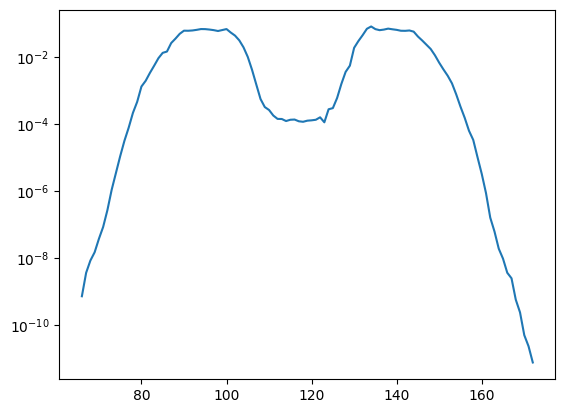

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt

dataset =pd.read_csv('U235_2.csv')
#print(dataset)
print(dataset.shape)

print('Rows: %d' % dataset.shape[0])
print('Cols: %d' % dataset.shape[1])
array1 = dataset.values
x = array1[:,:-1]
y = array1[:,1]
plt.plot(x,y)
plt.yscale('log')
print(x)

print(y)

In [3]:
#sklearn lib
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [4]:
#tensorflow lib
model = tf.keras.models.Sequential()

In [5]:
model.add(tf.keras.layers.Dense(256, input_shape=x_train.shape[1:], activation='relu'))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='relu'))

In [6]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [7]:
model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 381ms/step - loss: 7.2398e-04 - accuracy: 0.0000e+00


[0.0007239821716211736, 0.0]

In [8]:
predictions = model.predict(x_test)

1/1 [==============================] - 0s 79ms/step


In [9]:
def prior(kernel_size, bias_size, dtype=None):
    n = kernel_size + bias_size
    prior_model = keras.Sequential(
        [
            tfp.layers.DistributionLambda(
                lambda t: tfp.distributions.MultivariateNormalDiag(
                    loc=tf.zeros(n), scale_diag=tf.ones(n)
                )
            )
        ]
    )
    return prior_model


# Define variational posterior weight distribution as multivariate Gaussian.
# Note that the learnable parameters for this distribution are the means,
# variances, and covariances.
def posterior(kernel_size, bias_size, dtype=None):
    n = kernel_size + bias_size
    posterior_model = keras.Sequential(
        [
            tfp.layers.VariableLayer(
                tfp.layers.MultivariateNormalTriL.params_size(n), dtype=dtype
            ),
            tfp.layers.MultivariateNormalTriL(n),
        ]
    )
    return posterior_model

In [10]:
def create_bnn_model(train_size):
    inputs = create_model_inputs()
    features = keras.layers.concatenate(list(inputs.values()))
    features = layers.BatchNormalization()(features)

    # Create hidden layers with weight uncertainty using the DenseVariational layer.
    for units in hidden_units:
        features = tfp.layers.DenseVariational(
            units=units,
            make_prior_fn=prior,
            make_posterior_fn=posterior,
            kl_weight=1 / train_size,
            activation="sigmoid",
        )(features)

    # The output is deterministic: a single point estimate.
    outputs = layers.Dense(units=1)(features)
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

In [11]:
model.fit(x_train, y_train, epochs=1000)

Epoch 1/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 0.0000e+00
Epoch 2/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 0.0000e+00
Epoch 3/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0011 - accuracy: 0.0000e+00
Epoch 4/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0011 - accuracy: 0.0000e+00
Epoch 5/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0011 - accuracy: 0.0000e+00
Epoch 6/1000
3/3 [==============================] - 0s 999us/step - loss: 0.0011 - accuracy: 0.0000e+00
Epoch 7/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0011 - accuracy: 0.0000e+00
Epoch 8/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0011 - accuracy: 0.0000e+00
Epoch 9/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0011 - accuracy: 0.0000e+00
Epoch 10/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0011 